# Introductıon
* In this notebook i will create a ML model to predict death situation of covid 19.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings("ignore")

# Overview Dataset

In [26]:
df = pd.read_csv("Covid Dataaa.csv")
print("Shape of df :",df.shape)
df.head()

Shape of df : (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [28]:
df.isna().sum().sum()

0


* We have no NaN values but we will have missing values.


### Number of unique values by columns

In [29]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [30]:
df.DATE_DIED.value_counts()

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [31]:
df.PNEUMONIA.value_counts()

PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

### INFERENCE:
* 1) We have some features that we expect them to have just 2 unique values but we see that these features have 3 or 4 unique values. For example the feature "PNEUMONIA" has 3 unique values (1,2,99) 99 represents NaN values. Hence we will just take the rows that includes 1 and 2 values.
#### 
* 2) In "DATE_DIED" column, we have 971633 "9999-99-99" values which represent alive patients so i will take this feature as a "DEATH" that includes wether the patient died or not.

# Data Preprocessing

### Getting rid of the missing values of features except "INTUBED", "PREGNANT", "ICU"

In [32]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

### Preaparing "DATE_DIED" column

In [33]:
# If we have "9999-99-99" values that means this patient is alive.

df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

### Pregnant-Sex Bar Plot

In [34]:
plt.figure()
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="red");

ValueError: Cannot use `hue` without `x` and `y`

<Figure size 640x480 with 0 Axes>

* We see that all "97" values are for males and males can not be pregnant so we will convert 97 to 2.

In [35]:
# Converting process according to inference above
df.PREGNANT = df.PREGNANT.replace(97,2)

# Getting rid of the missing values
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

### Missing value analysis of "INTUBED" feature

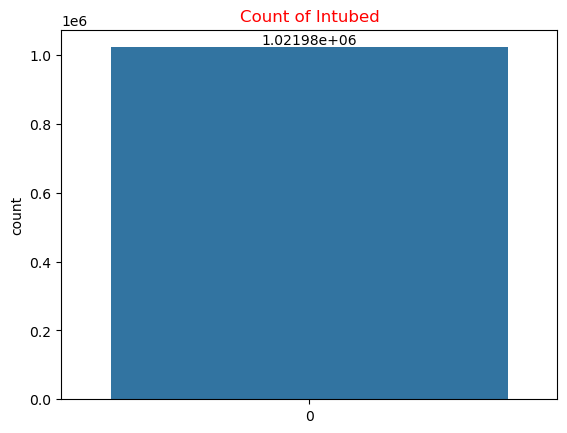

In [36]:

ax = sns.countplot(df.INTUBED)
plt.bar_label(ax.containers[0])
plt.title("Count of Intubed",color="red");

### Missing value analysis of "ICU" feature

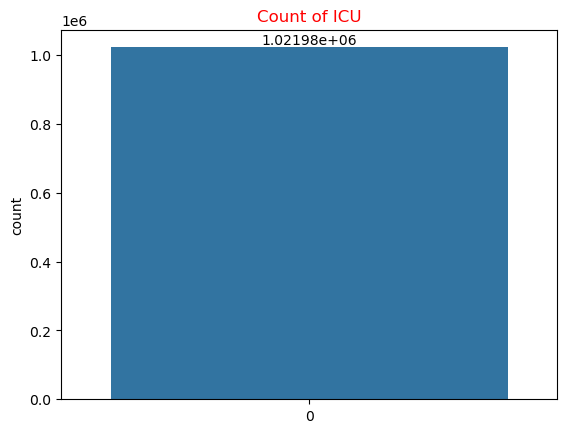

In [37]:
ax = sns.countplot(df.ICU)
plt.bar_label(ax.containers[0])
plt.title("Count of ICU",color="red");

### Droping the columns
* In "INTUBED" and "ICU" features there are too many missing values so i will drop them. Also we don't need "DATE_DIED" column anymore because we used this feature as a "DEATH" feature.

In [38]:
df.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

### Number of unique values by columns 

In [39]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
DEATH =>	 2


* As we see, we have just one numeric feature which is called "AGE" the rest of them are categorical.


# Data Visualization

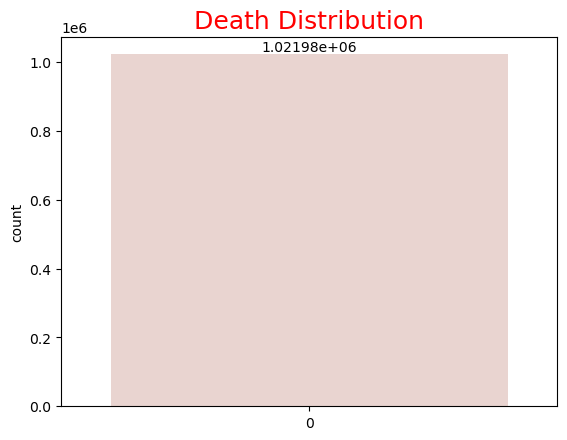

In [40]:
ax = sns.countplot(df.DEATH,palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");


* The values are distributed unbalanced in target column. This will probably cause an imbalance problem. Nonetheless i want you to see the problem. Hence i will go ahead for now and if we meet this problem i will try to figure it out.

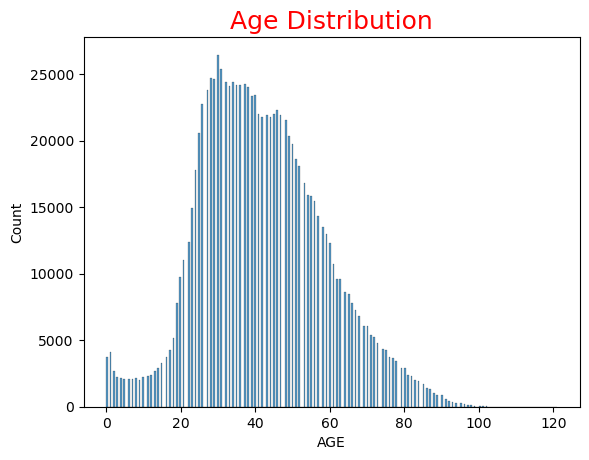

In [41]:
sns.histplot(x=df.AGE)
plt.title("Age Distribution", color="red", fontsize=18);

* Patients are roughly between 20-60 years old.

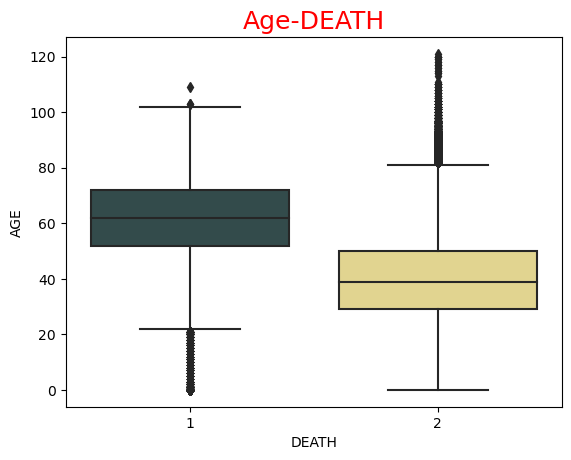

In [42]:
sns.boxplot(x="DEATH", y="AGE",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-DEATH",fontsize=18, color="red");

* The older patients are more likely to die compare to younger ones.

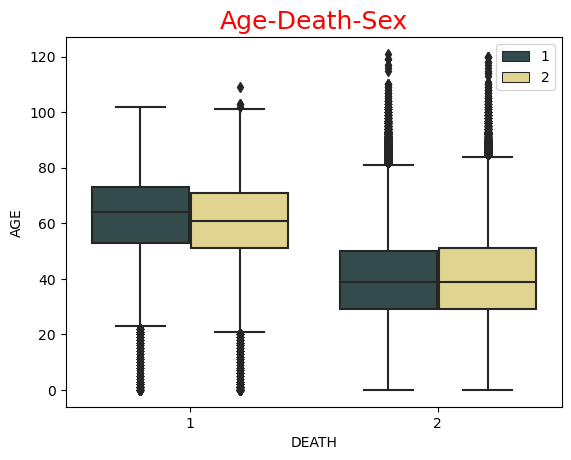

In [43]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18, color="red")
plt.legend(loc="best");

* The older patients are more likely to die compare to younger ones.
* There is no serious difference between males and females in terms of average rate of patients.

In [44]:
sns.countplot(df.SEX,hue=df.DEATH, palette=sns.cubehelix_palette(2))
plt.title("Sex-Death",fontsize=18, color="red")
plt.legend(loc="best");

ValueError: Cannot use `hue` without `x` and `y`

* Males are more likely to die of covid compare to females.

In [45]:
ax=sns.countplot(df.OBESITY,hue=df.DEATH, palette=sns.color_palette(["#7fffd4","#a52a2a"]))
plt.title("Obesity-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best");

ValueError: Cannot use `hue` without `x` and `y`

* Obese patients are more likely to die from covid compare to non-obese patients.

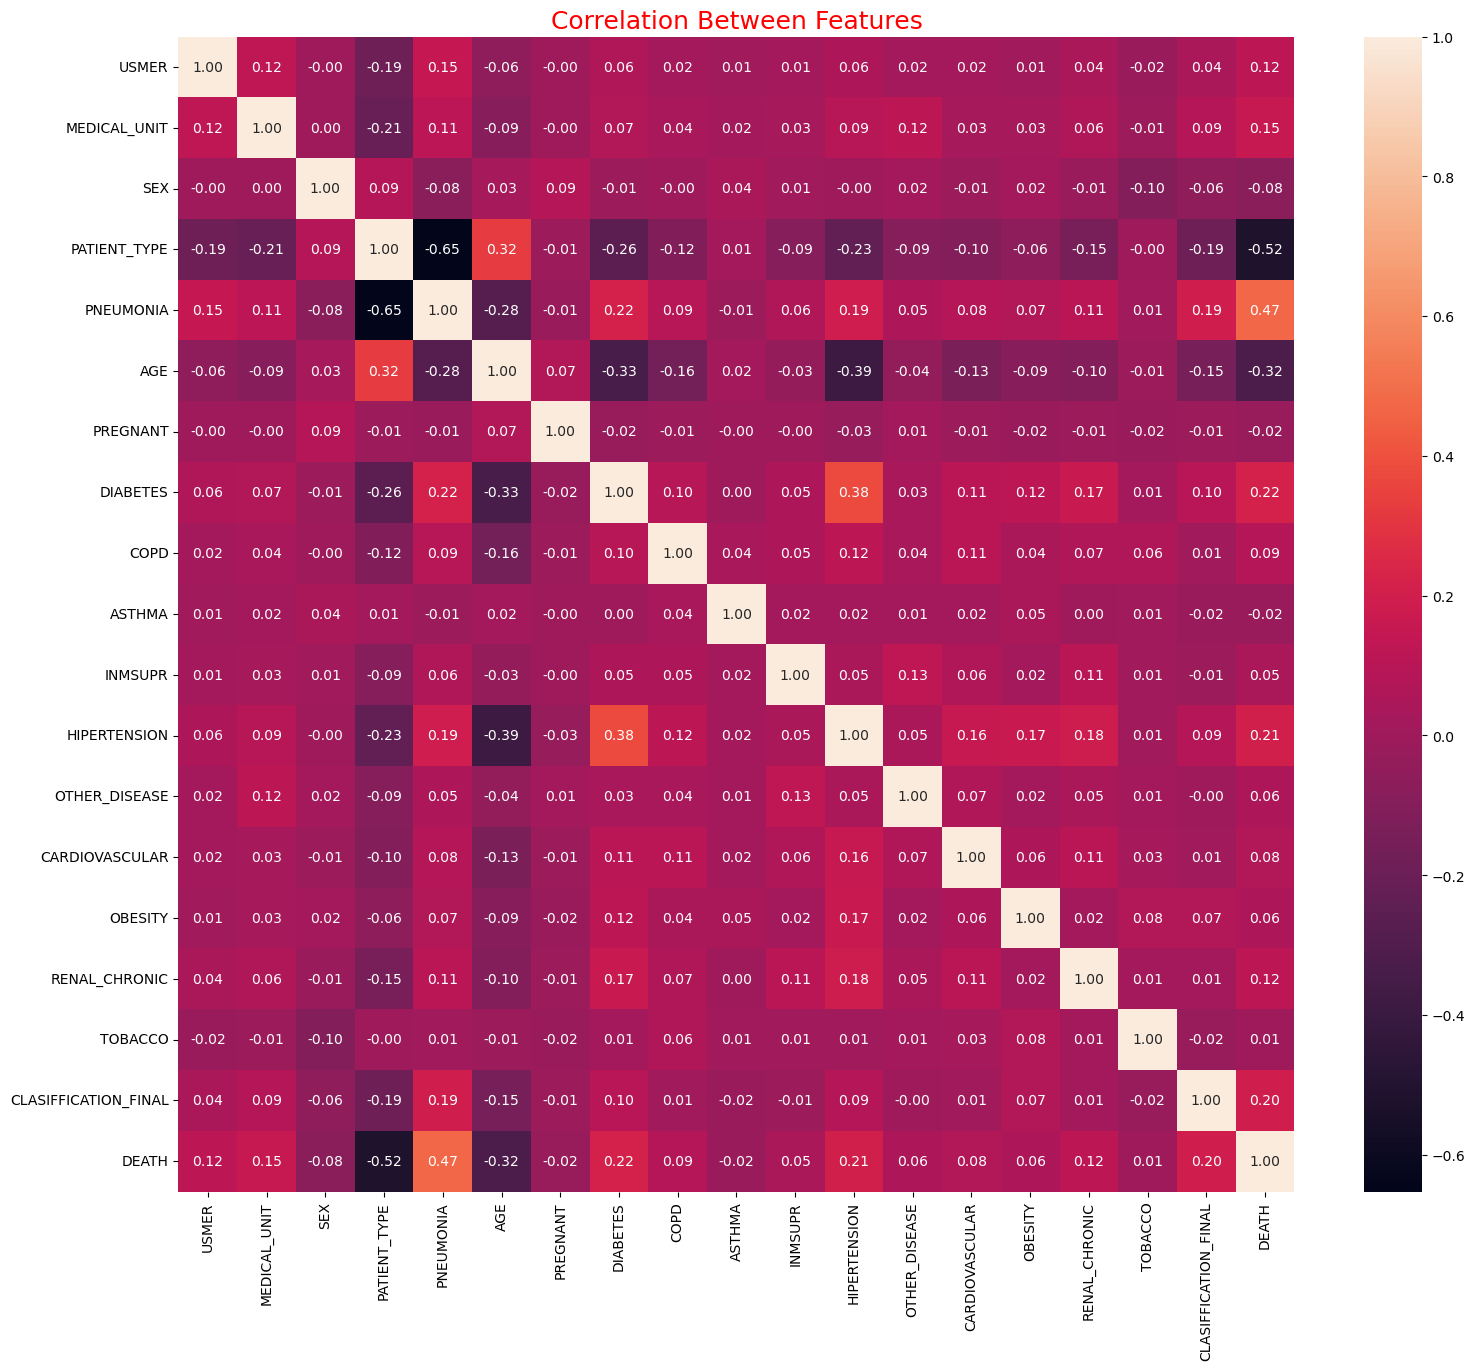

In [46]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

# Future Selection
* I will drop the features that have low correlation with "DEATH" feature.

In [47]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True)

In [48]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


### Preparing the categorical features which are not binary

In [49]:

df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

### Scaling the numeric feature

In [50]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

### Determining the "x" and "y"

In [51]:
x = df.drop(columns="DEATH")
y = df["DEATH"]

# Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (817581, 25)
Test_x : (204396, 25)
Train_y : (817581,)
Test_y : (204396,)




# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9393970527798978


In [54]:
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.51911953 0.96766075]


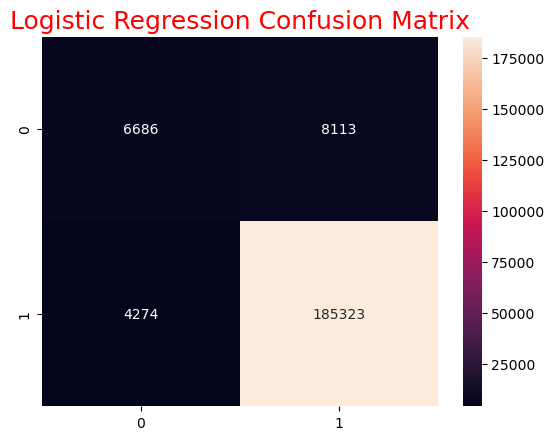

In [55]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

## Inference:
* We got well accuracy with Logistic Regression.
* But it can mislead us so we have to check the other metrics.
* When we look at the F1 Score it says that we predicted the patients who survived well but we can't say the same thing for dead patients.
* Also we see the same thing when we check the confusion matrix. This problem is based on imbalance dataset as i mentioned about it.

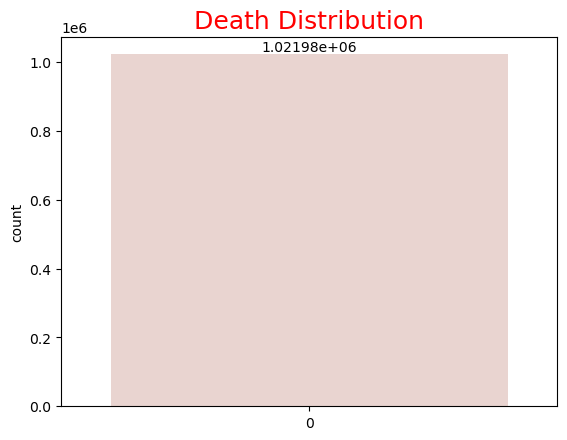

In [56]:
ax = sns.countplot(df.DEATH, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");

# How To Solve Imbalance Dataset Problem
* Loading More Datas
* Changing The Perfomance Metrics
* Resampling (Undersampling or Oversampling)
* Changing The Algorithm
* Penalized Models etc.

##### I am going to use Undersampling for this case because we already have too many patients.
* Undersampling : Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. 
* If we use Oversampling our row number will increase so this is too many rows for computer.
* If i can't solve the problem with Undersampling i will use the others.

In [57]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(x,y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\BHAGYASHREE\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
ax = sns.countplot(y_resampled, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");

# Train Test Split After Undersampling

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

# Logistic Regression After Undersampling

In [ ]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

In [ ]:
print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

In [ ]:
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

In [ ]:
input_data=(2,1,2,1,21/6/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97,2,2,2,2)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=logreg.predict(input_data_reshaped)
print(prediction)
if prediction[0]==0:
    print("The person is detected covid positive")
else:
    print("The person is detected covid negative")

## Logistic Regression Curve

In [ ]:
from sklearn.metrics import roc_curve
test_y = test_y.replace({2:1,1:0})
# Probabilities
logreg_pred_proba = logreg.predict_proba(test_x)

fpr, tpr, thresholds = roc_curve(test_y, logreg_pred_proba[:,1])
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

In [58]:
import pickle

In [59]:

filename='trained_model.sav'
pickle.dump(logreg,open(filename,'wb'))

In [60]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [61]:
input_data=(2,1,1,1,65,2,1,2,3,1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=loaded_model.predict(input_data_reshaped)
print(prediction)
if prediction[0]==0:
    print("The person is detected covid positive")
else:
    print("The person is detected covid negative")

[2]
The person is detected covid negative
